# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re    # for regular expressions
import nltk  # for text manipulation
import string
import warnings
import seaborn as sns 
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# Reading and Preprocessing

In [2]:
#reading the csv file
df=pd.read_csv('articles3.csv')

In [3]:
#display the information about the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42571 entries, 0 to 42570
Data columns (total 10 columns):
Unnamed: 0     42571 non-null int64
id             42571 non-null int64
title          42570 non-null object
publication    42571 non-null object
author         41599 non-null object
date           42556 non-null object
year           42556 non-null float64
month          42556 non-null float64
url            42571 non-null object
content        42571 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 3.2+ MB


### There are 42571 articles in this dataset but we will be needing the first 200 which is feasible for the Topic Modeling

In [4]:
#displaying the first 5 rows of the data set to get a visual view of the data set
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,"Alton Sterling’s son: ’Everyone needs to protest the right way, with peace’",Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/13/alton-sterling-son-cameron-protesters-baton-rouge,"The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the son of Alton ..."
1,103460,151909,Shakespeare’s first four folios sell at auction for almost £2.5m,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/25/shakespeares-first-four-folios-sell-at-auction-for-almost-25m,"Copies of William Shakespeare’s first four books, dubbed the “Holy Grail of publishing” have sold for almost £2. 5m at auction. Christie’s said they were sold as separate lots on Wednesday but wer..."
2,103461,151910,My grandmother’s death saved me from a life of debt,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016/oct/31/grandmothers-death-saved-me-life-of-debt,"Debt: $20, 000, Source: College, credit cards, Estimated time till debt free: Unclear, From a purely financial standpoint, my grandmother’s death is probably the best thing that has happened to me..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed me to find some,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016/nov/26/cancer-diagnosis-existential-life-accomplishments-meaning,"It was late. I was drunk, nearing my 35th birthday this past May, alone in a dank college dorm room, attending my grad school reunion. The journal entry I wrote that night was just one line: “I’..."
4,103463,151912,"Texas man serving life sentence innocent of double murder, judge says",Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/20/texas-life-sentence-innocence-dna-richard-bryan-kussmaul,"A central Texas man serving a life sentence for a double murder in 1992 is innocent, as are three codefendants no longer in prison, a state judge has found. Retired district judge George Allen rul..."


In [5]:
#considering only the first 200 data
newsdata=df[:200]

(array([51., 87., 39., 11.,  4.,  4.,  1.,  1.,  1.,  1.]),
 array([  120. ,  2851.4,  5582.8,  8314.2, 11045.6, 13777. , 16508.4,
        19239.8, 21971.2, 24702.6, 27434. ]),
 <a list of 10 Patch objects>)

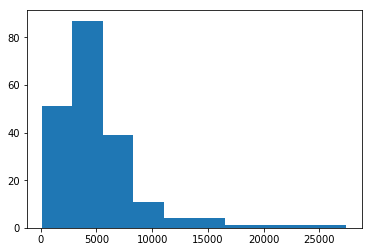

In [6]:
#histogram for content length so that we can get a visual interpretation of the data
plt.hist(newsdata.content.str.len())

### Most of the news articles are of length somewhere around 0 to 7500 characters

In [7]:
#removing puntuations and other symbols
newsdata['tidy_content'] = newsdata['content'].str.replace("[^a-zA-Z#]", " ")
newsdata.head()

C:\Users\Akarsh Somani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,id,title,publication,author,date,year,month,url,content,tidy_content
0,103459,151908,"Alton Sterling’s son: ’Everyone needs to protest the right way, with peace’",Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/13/alton-sterling-son-cameron-protesters-baton-rouge,"The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the son of Alton ...",The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for peace and no violence none whatsoever Cameron Sterling the son of Alton ...
1,103460,151909,Shakespeare’s first four folios sell at auction for almost £2.5m,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/25/shakespeares-first-four-folios-sell-at-auction-for-almost-25m,"Copies of William Shakespeare’s first four books, dubbed the “Holy Grail of publishing” have sold for almost £2. 5m at auction. Christie’s said they were sold as separate lots on Wednesday but wer...",Copies of William Shakespeare s first four books dubbed the Holy Grail of publishing have sold for almost m at auction Christie s said they were sold as separate lots on Wednesday but wer...
2,103461,151910,My grandmother’s death saved me from a life of debt,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016/oct/31/grandmothers-death-saved-me-life-of-debt,"Debt: $20, 000, Source: College, credit cards, Estimated time till debt free: Unclear, From a purely financial standpoint, my grandmother’s death is probably the best thing that has happened to me...",Debt Source College credit cards Estimated time till debt free Unclear From a purely financial standpoint my grandmother s death is probably the best thing that has happened to me...
3,103462,151911,I feared my life lacked meaning. Cancer pushed me to find some,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016/nov/26/cancer-diagnosis-existential-life-accomplishments-meaning,"It was late. I was drunk, nearing my 35th birthday this past May, alone in a dank college dorm room, attending my grad school reunion. The journal entry I wrote that night was just one line: “I’...",It was late I was drunk nearing my th birthday this past May alone in a dank college dorm room attending my grad school reunion The journal entry I wrote that night was just one line I ...
4,103463,151912,"Texas man serving life sentence innocent of double murder, judge says",Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/20/texas-life-sentence-innocence-dna-richard-bryan-kussmaul,"A central Texas man serving a life sentence for a double murder in 1992 is innocent, as are three codefendants no longer in prison, a state judge has found. Retired district judge George Allen rul...",A central Texas man serving a life sentence for a double murder in is innocent as are three codefendants no longer in prison a state judge has found Retired district judge George Allen rul...


In [8]:
#removing short words having length less than or equal to three as they does not contain much meaning
newsdata['tidy_content'] = newsdata['tidy_content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
newsdata.head()

C:\Users\Akarsh Somani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,id,title,publication,author,date,year,month,url,content,tidy_content
0,103459,151908,"Alton Sterling’s son: ’Everyone needs to protest the right way, with peace’",Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/13/alton-sterling-son-cameron-protesters-baton-rouge,"The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the son of Alton ...",Louisiana whose father shot killed range Baton Rouge police asked protesters peace violence none whatsoever Cameron Sterling Alton Sterling whose death hands police caught video spoke about father...
1,103460,151909,Shakespeare’s first four folios sell at auction for almost £2.5m,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/25/shakespeares-first-four-folios-sell-at-auction-for-almost-25m,"Copies of William Shakespeare’s first four books, dubbed the “Holy Grail of publishing” have sold for almost £2. 5m at auction. Christie’s said they were sold as separate lots on Wednesday but wer...",Copies William Shakespeare first four books dubbed Holy Grail publishing have sold almost auction Christie said they were sold separate lots Wednesday were bought anonymous private American collec...
2,103461,151910,My grandmother’s death saved me from a life of debt,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016/oct/31/grandmothers-death-saved-me-life-of-debt,"Debt: $20, 000, Source: College, credit cards, Estimated time till debt free: Unclear, From a purely financial standpoint, my grandmother’s death is probably the best thing that has happened to me...",Debt Source College credit cards Estimated time till debt free Unclear From purely financial standpoint grandmother death probably best thing that happened adult life grandmother came from oversea...
3,103462,151911,I feared my life lacked meaning. Cancer pushed me to find some,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016/nov/26/cancer-diagnosis-existential-life-accomplishments-meaning,"It was late. I was drunk, nearing my 35th birthday this past May, alone in a dank college dorm room, attending my grad school reunion. The journal entry I wrote that night was just one line: “I’...",late drunk nearing birthday this past alone dank college dorm room attending grad school reunion journal entry wrote that night just line want reunion charades nothing about life actually suggeste...
4,103463,151912,"Texas man serving life sentence innocent of double murder, judge says",Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/20/texas-life-sentence-innocence-dna-richard-bryan-kussmaul,"A central Texas man serving a life sentence for a double murder in 1992 is innocent, as are three codefendants no longer in prison, a state judge has found. Retired district judge George Allen rul...",central Texas serving life sentence double murder innocent three codefendants longer prison state judge found Retired district judge George Allen ruled Friday that Richard Bryan Kussmaul should fr...


In [9]:
#just tokenizing the news data and storing it in a variable for cleaning.
tokenized_content = newsdata['tidy_content'].apply(lambda x: x.split()) # tokenizing
tokenized_content.head()

0    [Louisiana, whose, father, shot, killed, range, Baton, Rouge, police, asked, protesters, peace, violence, none, whatsoever, Cameron, Sterling, Alton, Sterling, whose, death, hands, police, caught,...
1    [Copies, William, Shakespeare, first, four, books, dubbed, Holy, Grail, publishing, have, sold, almost, auction, Christie, said, they, were, sold, separate, lots, Wednesday, were, bought, anonymou...
2    [Debt, Source, College, credit, cards, Estimated, time, till, debt, free, Unclear, From, purely, financial, standpoint, grandmother, death, probably, best, thing, that, happened, adult, life, gran...
3    [late, drunk, nearing, birthday, this, past, alone, dank, college, dorm, room, attending, grad, school, reunion, journal, entry, wrote, that, night, just, line, want, reunion, charades, nothing, a...
4    [central, Texas, serving, life, sentence, double, murder, innocent, three, codefendants, longer, prison, state, judge, found, Retired, district, judge, George, Allen, ruled, F

In [10]:
#Removing the stop words from the tokenised document
from nltk.corpus import stopwords  
stop_words = set(stopwords.words('english')) #getting collection of the stopwords from predefined library
tokenized_content = tokenized_content.apply(lambda x: [i for i in x if i not in stop_words])  
tokenized_content.head()

0    [Louisiana, whose, father, shot, killed, range, Baton, Rouge, police, asked, protesters, peace, violence, none, whatsoever, Cameron, Sterling, Alton, Sterling, whose, death, hands, police, caught,...
1    [Copies, William, Shakespeare, first, four, books, dubbed, Holy, Grail, publishing, sold, almost, auction, Christie, said, sold, separate, lots, Wednesday, bought, anonymous, private, American, co...
2    [Debt, Source, College, credit, cards, Estimated, time, till, debt, free, Unclear, From, purely, financial, standpoint, grandmother, death, probably, best, thing, happened, adult, life, grandmothe...
3    [late, drunk, nearing, birthday, past, alone, dank, college, dorm, room, attending, grad, school, reunion, journal, entry, wrote, night, line, want, reunion, charades, nothing, life, actually, sug...
4    [central, Texas, serving, life, sentence, double, murder, innocent, three, codefendants, longer, prison, state, judge, found, Retired, district, judge, George, Allen, ruled, F

In [11]:
#Now we can normalize the tokenized news document.
from nltk.stem.porter import *
stemmer = PorterStemmer()#using porter tokeniser
tokenized_content = tokenized_content.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [12]:
#Now let’s stitch these tokens back together in a seperate variable let's say cleaned news.
cleaned_news=[]
for i in range(len(tokenized_content)):
    cleaned_news.append(' '.join(tokenized_content[i]))
    
newsdata['tidy_content'] = cleaned_news

C:\Users\Akarsh Somani\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
newsdata.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,tidy_content
0,103459,151908,"Alton Sterling’s son: ’Everyone needs to protest the right way, with peace’",Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/13/alton-sterling-son-cameron-protesters-baton-rouge,"The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the son of Alton ...",louisiana whose father shot kill rang baton roug polic ask protest peac violenc none whatsoev cameron sterl alton sterl whose death hand polic caught video spoke father protest alton sterl kill ba...
1,103460,151909,Shakespeare’s first four folios sell at auction for almost £2.5m,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/25/shakespeares-first-four-folios-sell-at-auction-for-almost-25m,"Copies of William Shakespeare’s first four books, dubbed the “Holy Grail of publishing” have sold for almost £2. 5m at auction. Christie’s said they were sold as separate lots on Wednesday but wer...",copi william shakespear first four book dub holi grail publish sold almost auction christi said sold separ lot wednesday bought anonym privat american collector sale london includ bard first folio...
2,103461,151910,My grandmother’s death saved me from a life of debt,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016/oct/31/grandmothers-death-saved-me-life-of-debt,"Debt: $20, 000, Source: College, credit cards, Estimated time till debt free: Unclear, From a purely financial standpoint, my grandmother’s death is probably the best thing that has happened to me...",debt sourc colleg credit card estim time till debt free unclear from pure financi standpoint grandmoth death probabl best thing happen adult life grandmoth came oversea live mother high school rav...
3,103462,151911,I feared my life lacked meaning. Cancer pushed me to find some,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016/nov/26/cancer-diagnosis-existential-life-accomplishments-meaning,"It was late. I was drunk, nearing my 35th birthday this past May, alone in a dank college dorm room, attending my grad school reunion. The journal entry I wrote that night was just one line: “I’...",late drunk near birthday past alon dank colleg dorm room attend grad school reunion journal entri wrote night line want reunion charad noth life actual suggest track ambiti public servic aspir wor...
4,103463,151912,"Texas man serving life sentence innocent of double murder, judge says",Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/20/texas-life-sentence-innocence-dna-richard-bryan-kussmaul,"A central Texas man serving a life sentence for a double murder in 1992 is innocent, as are three codefendants no longer in prison, a state judge has found. Retired district judge George Allen rul...",central texa serv life sentenc doubl murder innoc three codefend longer prison state judg found retir district judg georg allen rule friday richard bryan kussmaul free three codefend receiv senten...


In [14]:
newsdata_preprocessed=newsdata[['title','content','tidy_content']]
newsdata_preprocessed.head()

,title,content,tidy_content
0,"Alton Sterling’s son: ’Everyone needs to protest the right way, with peace’","The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the son of Alton ...",louisiana whose father shot kill rang baton roug polic ask protest peac violenc none whatsoev cameron sterl alton sterl whose death hand polic caught video spoke father protest alton sterl kill ba...
1,Shakespeare’s first four folios sell at auction for almost £2.5m,"Copies of William Shakespeare’s first four books, dubbed the “Holy Grail of publishing” have sold for almost £2. 5m at auction. Christie’s said they were sold as separate lots on Wednesday but wer...",copi william shakespear first four book dub holi grail publish sold almost auction christi said sold separ lot wednesday bought anonym privat american collector sale london includ bard first folio...
2,My grandmother’s death saved me from a life of debt,"Debt: $20, 000, Source: College, credit cards, Estimated time till debt free: Unclear, From a purely financial standpoint, my grandmother’s death is probably the best thing that has happened to me...",debt sourc colleg credit card estim time till debt free unclear from pure financi standpoint grandmoth death probabl best thing happen adult life grandmoth came oversea live mother high school rav...
3,I feared my life lacked meaning. Cancer pushed me to find some,"It was late. I was drunk, nearing my 35th birthday this past May, alone in a dank college dorm room, attending my grad school reunion. The journal entry I wrote that night was just one line: “I’...",late drunk near birthday past alon dank colleg dorm room attend grad school reunion journal entri wrote night line want reunion charad noth life actual suggest track ambiti public servic aspir wor...
4,"Texas man serving life sentence innocent of double murder, judge says","A central Texas man serving a life sentence for a double murder in 1992 is innocent, as are three codefendants no longer in prison, a state judge has found. Retired district judge George Allen rul...",central texa serv life sentenc doubl murder innoc three codefend longer prison state judg found retir district judg georg allen rule friday richard bryan kussmaul free three codefend receiv senten...


In [15]:
newsdata_preprocessed.to_csv('cleaned_news.csv')